# Student alcohol consumption
Marco Spanò (s1045892) - Peter Horvath (s1042834)

### Problem:

Alcohol has a bad influence on human life. Despite this, alcoholic drinks are nowadays really
common, especially in teenagers’ life that are the ones who suffer the most from the
consequences of it (the effects alcohol has on the brain and everyday’s life).
The dataset we found contains records of students in secondary school that attended math
and portuguese language courses with 33 attributes regarding personal info, alcohol
consumption, grades and more.
Starting from this dataset we are going to make inferences such as the level of alcohol
consumption of a student (based on the other columns) or predicting the grades he/she will
get. Furthermore, we can also explore some characteristics of the dataset, like inspecting
how alcohol influences the grades of a student.
Finally we can try to compare these results with other’s taken from other similar dataset
(students from different countries or older/younger) and see if there is correlation from them.
Dataset: https://www.kaggle.com/uciml/student-alcohol-consumption#student-mat.csv

### Our solution:

Our first aim is to start applying a decision tree classifier (and later on also a random forest)
on the dataset since it is easily understandable and as well as having a good classifier we
can also see which are the variables that most affect the final result.
Secondly we will apply a naive bayes classifier to compare the results we get from the
decision tree to it. Also with the naive classifier we can try to inspect which attributes
contribute the most to predict the outcome.
Eventually we can try to apply a small neural network on the dataset and see if it we can
achieve a better accuracy, even if the dataset is not so big and the probability of it are low.

### Literature:

Paper from the researchers who shared the dataset:
https://bradzzz.gitbooks.io/ga-seattle-dsi/dsi/dsi_05_classification_databases/2.1-lesson/ass
ets/datasets/STUDENT%20ALCOHOL%20CONSUMPTION.pdf
A study on alcohol consumption of undergraduate students in the UK in 2000-2001:
https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-8-163
A similar study also in UK during 2008-2009:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/

In [111]:
import pandas as pd
import numpy as np
import category_encoders as ce
%matplotlib inline

#reading the two csv files and merging them with 'append'
data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')
merged = data_mat.append(data_por)

column_names = merged.columns
classNames = merged.G3.unique()
classNames = np.sort(classNames)
print(classNames)


#we have to use certain columns for removing duplicates (not all of the columns), the column names are given in the .R file
column_names_for_subsetting = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
merged = merged.drop_duplicates(subset = column_names_for_subsetting).values

print(data_mat.shape)
print(data_por.shape)
print(merged)

[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(395, 33)
(649, 33)
[['GP' 'F' 18 ... 5 6 6]
 ['GP' 'F' 17 ... 5 5 6]
 ['GP' 'F' 15 ... 7 8 10]
 ...
 ['MS' 'F' 18 ... 16 15 15]
 ['MS' 'F' 19 ... 7 8 9]
 ['MS' 'F' 17 ... 6 9 11]]


In [112]:
# creating a categorical encoder with the indices list
# the encoder will encode only those columns which are in the indices
indices = [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
encoder = ce.ordinal.OrdinalEncoder(cols = indices)

#encoding the selected columns
#the encoder returns a pandas dataframe so we have to use the 'values' again to get the values in a numpy array
merged = encoder.fit_transform(merged)
merged = merged.values
print(merged)




[[ 1  1 18 ...  5  6  6]
 [ 1  1 17 ...  5  5  6]
 [ 1  1 15 ...  7  8 10]
 ...
 [ 2  1 18 ... 16 15 15]
 [ 2  1 19 ...  7  8  9]
 [ 2  1 17 ...  6  9 11]]


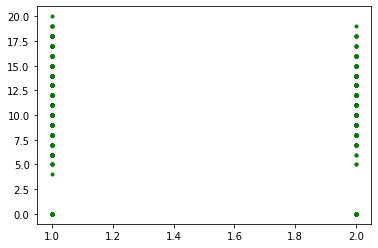

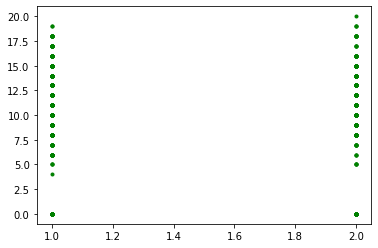

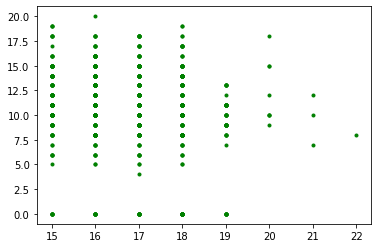

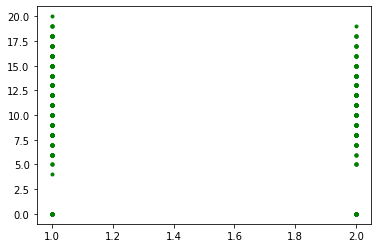

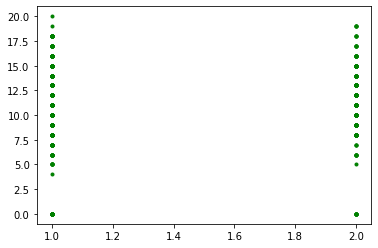

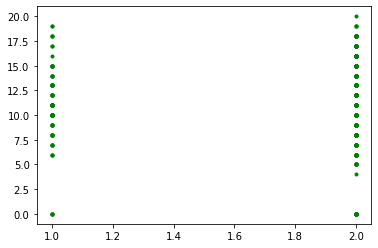

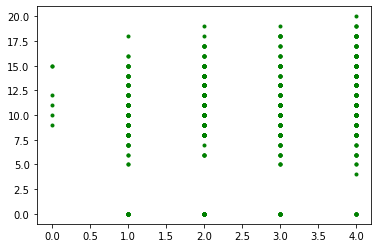

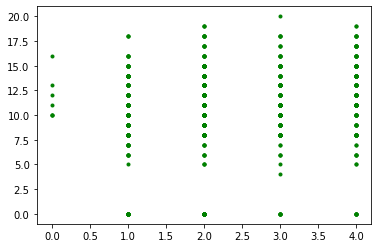

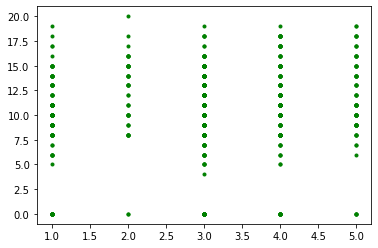

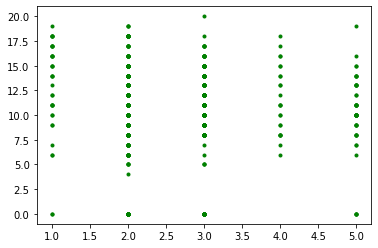

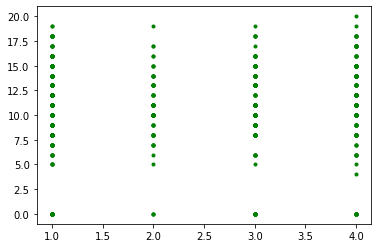

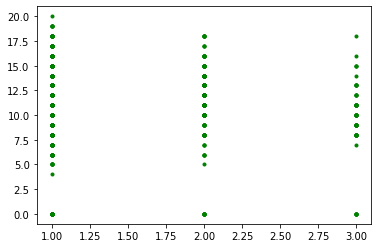

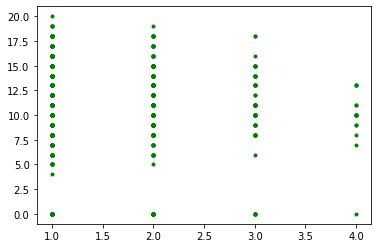

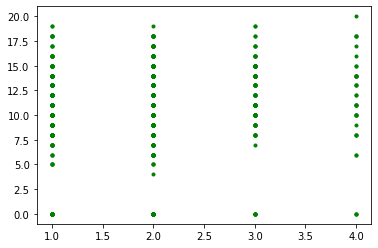

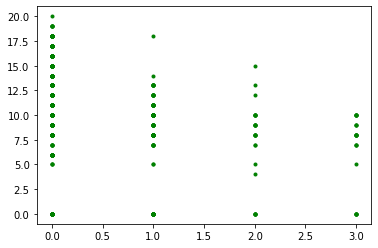

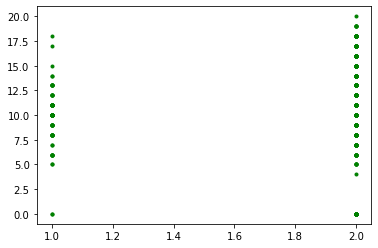

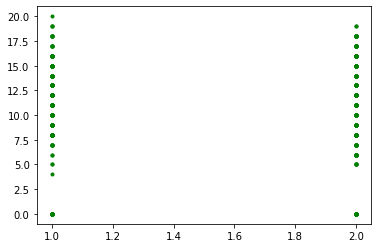

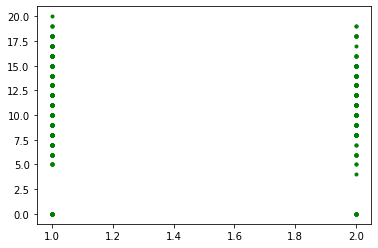

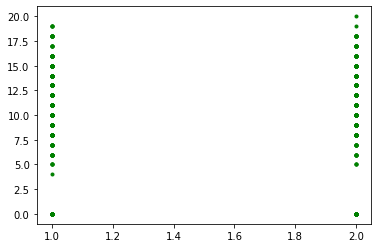

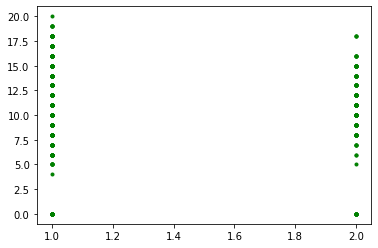

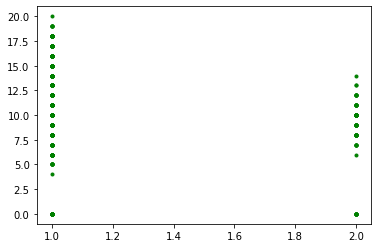

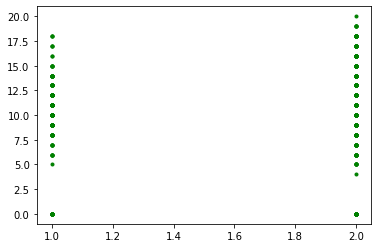

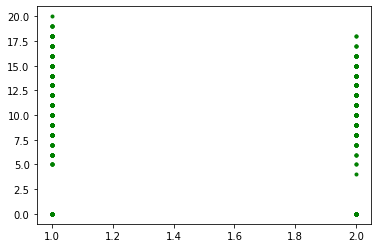

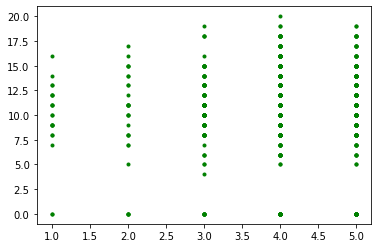

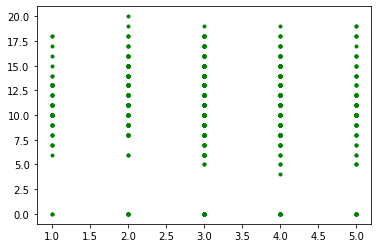

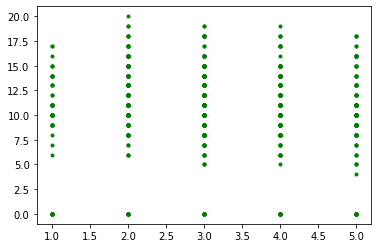

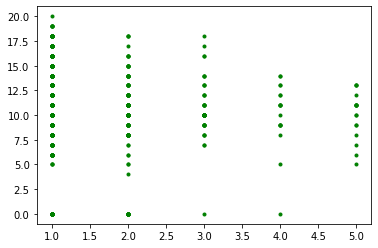

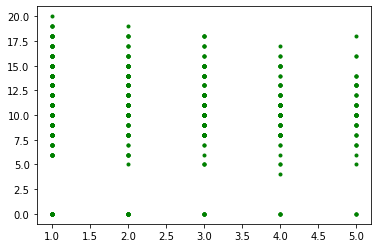

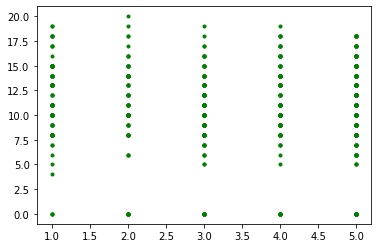

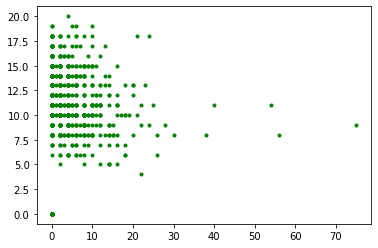

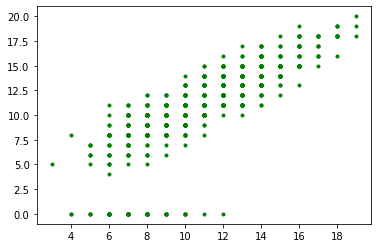

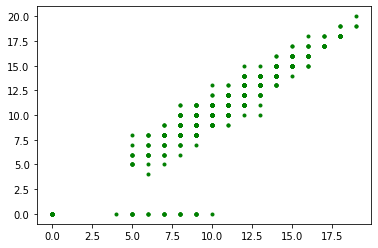

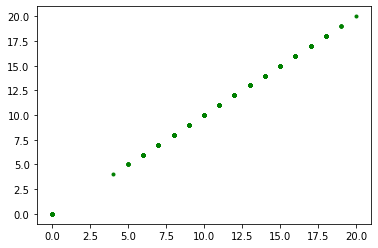

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,33):
    #fig, pc = plt.subplots(1,2,figsize=(10,10))
    #for j in range(1,2):
    plt.plot(merged[:, i], merged[:, 32], 'g.')
    plt.show()
#         pc[0][j].set_title(f'PC {i+1} over PC {j+1}')
#         pc[0][j].set_xlabel(f'PC {i+1}')
#         pc[0][j].set_ylabel(f'PC {j+1}')


plt.tight_layout()
plt.show()

# Preprocessing

In [4]:
#deleting possible outliers, the one with grade 0, 1 or 5
merged = merged[merged[:,32] > 0, :]
#merged = merged[merged[:,32] < 20, :]
print(merged.shape)

(617, 33)


In [113]:
#normalizing the features/attributes

from sklearn import preprocessing

normalized = preprocessing.normalize(merged, axis = 0)

###mention that there is no difference with naive bayes when we normalize i.e. it performs the same(shi*)

# Dividing in training and test

In [6]:
import sklearn.model_selection as skl

#shows how much data you want to put in the testing dataset, the rest goes to the training one
holdout = 0.3

#use the same seed for all the depths
random_seed = 0

X = merged[:, :31]
y = merged[:, 32]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=holdout, stratify=y, random_state=random_seed)

(617, 31) (617,)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# Decision Tree Classifier

In [ ]:
from sklearn import tree
from Toolbox.treeprint import tree_print



print("With min_samples_split = 100:\n")
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30)
tree_print(clf.fit(X,y),column_names[:31],classNames)
print("\n")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
print(y_1)
y_2 = regr_2.predict(X_test)

acc_1 = regr_1.score(X_test, y_test)
acc_2 = regr_2.score(X_test, y_test)
print(acc_1, acc_2)

In [ ]:
tree_print(regr_1.fit(X,y),column_names[:31],classNames)

In [ ]:
import graphviz

dot_data = tree.export_graphviz(regr_1, out_file=None, 
                     feature_names=column_names[:31],  
                     class_names=classNames,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [126]:
#preparing the data for naive bayes
from sklearn.naive_bayes import MultinomialNB

X = normalized[:,:30] #30
y = merged[:,32]
print(y.shape,X.shape)
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=0.3, random_state=1)

(662,) (662, 30)


In [8]:
#creating a naive-bayes model and training it with the training set
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train) 

#using the trained model to predict the labels on the test set and display the results
y_pred = mnb.predict(X_test) 
 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 15.591397849462366


In [117]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras 
print(y_test)
y_train = keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

NN_model = Sequential()

NN_model.add(Dense(30, input_dim = X_train.shape[1], activation='softmax'))

# The Hidden Layers :
NN_model.add(Dense(18, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

# Compile the network :
NN_model.compile(loss='mean_squared_error',optimizer=keras.optimizers.adam(learning_rate=1e-3))
NN_model.summary()

history = NN_model.fit(X_train, y_train, epochs=500, batch_size=20, validation_data=(X_test,y_test), verbose = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()   

[10 15 20 10  5 15  0 12  8  7 17 15 12  0 11 11 16 10 12 11 10 11 14 14
 16  8 18 11 14 17 11 15 16 10 10 11 12 16 17 14  9 11  9  0 12 11 10 16
 10  0 12 11 15 13 16 15 13 12 11  0  9  9  8 12  9 13 11 10  8 10  8  6
  8 14 10 10 10 15 10 10 16 14 10 11  0 15  6  6 10  0  9 17  6 11 14  9
 13 18  0 10 15 15 17 12 12 10 13 12  0 10  9 18  9 13 15 10  8 13 18  6
 10 13 14 15  7  9  8  7  8 14 13 12 14 14  7 13 11  8 12  9  9  0  0 11
  9 16  8 11  8  0 11 10 15 13  8 12 14 11 13 11  6  8  7 14 12 10  8 15
  0 15 14 13 10 18 10 15 11 11 12 11 17 15 13  0  0 11  9 16 10  0  7  6
  8 13  9 11 13 10  9]


IndexError: index 20 is out of bounds for axis 1 with size 20

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 529 samples, validate on 133 samples
Epoch 1/20
529/529 [==============================] - 1s 1ms/step - loss: 0.6399 - acc: 1.0000 - val_loss: 0.6387 - val_acc: 1.0000
Epoch 2/20
529/529 [==============================] - 0s 156us/step - loss: 0.6347 - acc: 1.0000 - val_loss: 0.6335 - val_acc: 1.0000
Epoch 3/20
529/529 [==============================] - 0s 137us/step - loss: 0.6296 - acc: 1.0000 - val_loss: 0.6284 - val_acc: 1.0000
Epoch 4/20
529/529 [==============================] - 0s 161us/step - loss: 0.6244 - acc: 1.0000 - val_loss: 0.6233 - val_acc: 1.0000
Epoch 5/20
529/529 [==============================] - 0s 150us/step - l

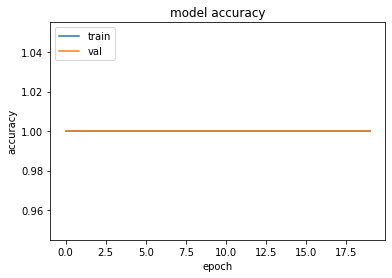

Train on 529 samples, validate on 133 samples
Epoch 1/20
529/529 [==============================] - 1s 1ms/step - loss: 0.6534 - acc: 1.0000 - val_loss: 0.6498 - val_acc: 1.0000
Epoch 2/20
529/529 [==============================] - 0s 157us/step - loss: 0.6481 - acc: 1.0000 - val_loss: 0.6446 - val_acc: 1.0000
Epoch 3/20
529/529 [==============================] - 0s 207us/step - loss: 0.6428 - acc: 1.0000 - val_loss: 0.6393 - val_acc: 1.0000
Epoch 4/20
529/529 [==============================] - 0s 169us/step - loss: 0.6376 - acc: 1.0000 - val_loss: 0.6341 - val_acc: 1.0000
Epoch 5/20
529/529 [==============================] - 0s 138us/step - loss: 0.6325 - acc: 1.0000 - val_loss: 0.6290 - val_acc: 1.0000
Epoch 6/20
529/529 [==============================] - 0s 157us/step - loss: 0.6274 - acc: 1.0000 - val_loss: 0.6238 - val_acc: 1.0000
Epoch 7/20
529/529 [==============================] - 0s 121us/step - loss: 0.6223 - acc: 1.0000 - val_loss: 0.6188 - val_acc: 1.0000
Epoch 8/20
529/529

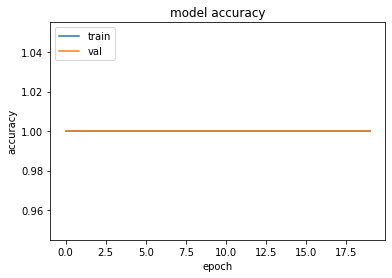

Train on 530 samples, validate on 132 samples
Epoch 1/20
530/530 [==============================] - 1s 993us/step - loss: 0.7088 - acc: 0.0792 - val_loss: 0.7067 - val_acc: 0.1212
Epoch 2/20
530/530 [==============================] - 0s 110us/step - loss: 0.7032 - acc: 0.2000 - val_loss: 0.7010 - val_acc: 0.2197
Epoch 3/20
530/530 [==============================] - 0s 104us/step - loss: 0.6977 - acc: 0.3774 - val_loss: 0.6954 - val_acc: 0.4015
Epoch 4/20
530/530 [==============================] - 0s 101us/step - loss: 0.6922 - acc: 0.5491 - val_loss: 0.6898 - val_acc: 0.6515
Epoch 5/20
530/530 [==============================] - 0s 106us/step - loss: 0.6867 - acc: 0.7358 - val_loss: 0.6843 - val_acc: 0.7955
Epoch 6/20
530/530 [==============================] - 0s 102us/step - loss: 0.6813 - acc: 0.8434 - val_loss: 0.6788 - val_acc: 0.9015
Epoch 7/20
530/530 [==============================] - 0s 105us/step - loss: 0.6759 - acc: 0.9321 - val_loss: 0.6733 - val_acc: 0.9621
Epoch 8/20
530/5

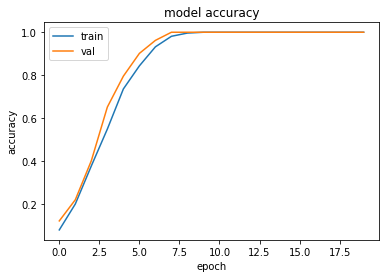

Train on 530 samples, validate on 132 samples
Epoch 1/20
530/530 [==============================] - 1s 1ms/step - loss: 0.6951 - acc: 0.3925 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/20
530/530 [==============================] - 0s 114us/step - loss: 0.6896 - acc: 0.5226 - val_loss: 0.6856 - val_acc: 0.6212
Epoch 3/20
530/530 [==============================] - 0s 101us/step - loss: 0.6841 - acc: 0.6698 - val_loss: 0.6802 - val_acc: 0.7652
Epoch 4/20
530/530 [==============================] - 0s 99us/step - loss: 0.6786 - acc: 0.7792 - val_loss: 0.6749 - val_acc: 0.8485
Epoch 5/20
530/530 [==============================] - 0s 99us/step - loss: 0.6732 - acc: 0.8962 - val_loss: 0.6695 - val_acc: 0.9394
Epoch 6/20
530/530 [==============================] - 0s 108us/step - loss: 0.6678 - acc: 0.9472 - val_loss: 0.6643 - val_acc: 0.9848
Epoch 7/20
530/530 [==============================] - 0s 104us/step - loss: 0.6625 - acc: 0.9868 - val_loss: 0.6590 - val_acc: 0.9848
Epoch 8/20
530/530 [

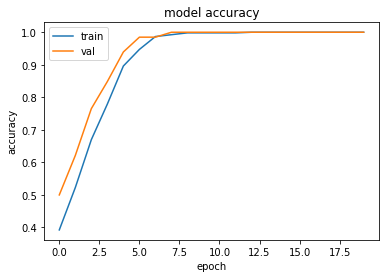

Train on 530 samples, validate on 132 samples
Epoch 1/20
530/530 [==============================] - 1s 1ms/step - loss: 0.7594 - acc: 0.0000e+00 - val_loss: 0.7482 - val_acc: 0.0000e+00
Epoch 2/20
530/530 [==============================] - 0s 165us/step - loss: 0.7535 - acc: 0.0000e+00 - val_loss: 0.7424 - val_acc: 0.0000e+00
Epoch 3/20
530/530 [==============================] - 0s 165us/step - loss: 0.7476 - acc: 0.0000e+00 - val_loss: 0.7367 - val_acc: 0.0000e+00
Epoch 4/20
530/530 [==============================] - 0s 163us/step - loss: 0.7419 - acc: 0.0000e+00 - val_loss: 0.7310 - val_acc: 0.0000e+00
Epoch 5/20
530/530 [==============================] - 0s 141us/step - loss: 0.7361 - acc: 0.0000e+00 - val_loss: 0.7253 - val_acc: 0.0000e+00
Epoch 6/20
530/530 [==============================] - 0s 150us/step - loss: 0.7304 - acc: 0.0000e+00 - val_loss: 0.7197 - val_acc: 0.0000e+00
Epoch 7/20
530/530 [==============================] - 0s 152us/step - loss: 0.7247 - acc: 0.0019 - val_l

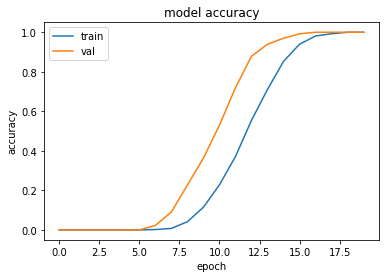

Mean accuracy: 1.0


In [136]:
###binarization
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
kf.get_n_splits(X)



NN_model.summary()


grades = merged[:,32]
grades[grades >= 10] = 1
grades[grades < 10] = 0

acc = []

for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
    y_test = keras.utils.to_categorical(y_test, num_classes=2, dtype='float32')
    
    NN_model = Sequential()
    NN_model.add(Dense(2, input_dim = X_train.shape[1], activation='softmax'))
    NN_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.adam(learning_rate=1e-4), metrics=['acc'])
    
    history = NN_model.fit(X_train, y_train, epochs=20, batch_size=20, verbose = 1, validation_data=(X_test, y_test))
    acc.append(history.history['acc'][19])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
#X_train, X_test, y_train, y_test = skl.train_test_split(X, grades, test_size=0.5, random_state=4)

print("Mean accuracy:", np.mean(acc))


(617, 29)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 28)                840       
_________________________________________________________________
dense_101 (Dense)            (None, 18)                522       
_________________________________________________________________
dense_102 (Dense)            (None, 10)                190       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 11        
Total params: 1,563
Trainable params: 1,563
Non-trainable params: 0
_________________________________________________________________
Train on 370 samples, validate on 247 samples
Epoch 1/1000
370/370 [==============================] - 1s 3ms/step - loss: 18.1545 - val_loss: 18.4647
Epoch 2/1000
370/370 [==============================] - 0s 301us/step - loss: 17.4529 - v

370/370 [==============================] - 0s 274us/step - loss: 3.7994 - val_loss: 4.2119
Epoch 71/1000
370/370 [==============================] - 0s 326us/step - loss: 3.8014 - val_loss: 4.2085
Epoch 72/1000
370/370 [==============================] - 0s 252us/step - loss: 3.8076 - val_loss: 4.2043
Epoch 73/1000
370/370 [==============================] - 0s 219us/step - loss: 3.7975 - val_loss: 4.2019
Epoch 74/1000
370/370 [==============================] - 0s 260us/step - loss: 3.8119 - val_loss: 4.2009
Epoch 75/1000
370/370 [==============================] - 0s 290us/step - loss: 3.8026 - val_loss: 4.1953
Epoch 76/1000
370/370 [==============================] - 0s 358us/step - loss: 3.7952 - val_loss: 4.1943
Epoch 77/1000
370/370 [==============================] - 0s 294us/step - loss: 3.7903 - val_loss: 4.1892
Epoch 78/1000
370/370 [==============================] - 0s 302us/step - loss: 3.7772 - val_loss: 4.1865
Epoch 79/1000
370/370 [==============================] - 0s 296us/ste

370/370 [==============================] - 0s 331us/step - loss: 3.3741 - val_loss: 3.7570
Epoch 148/1000
370/370 [==============================] - 0s 252us/step - loss: 3.3604 - val_loss: 3.7498
Epoch 149/1000
370/370 [==============================] - 0s 191us/step - loss: 3.3668 - val_loss: 3.7409
Epoch 150/1000
370/370 [==============================] - 0s 189us/step - loss: 3.3455 - val_loss: 3.7328
Epoch 151/1000
370/370 [==============================] - 0s 183us/step - loss: 3.3411 - val_loss: 3.7254
Epoch 152/1000
370/370 [==============================] - 0s 298us/step - loss: 3.3255 - val_loss: 3.7161
Epoch 153/1000
370/370 [==============================] - 0s 215us/step - loss: 3.3203 - val_loss: 3.7087
Epoch 154/1000
370/370 [==============================] - 0s 212us/step - loss: 3.3184 - val_loss: 3.7013
Epoch 155/1000
370/370 [==============================] - 0s 240us/step - loss: 3.3032 - val_loss: 3.6940
Epoch 156/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 330us/step - loss: 2.8939 - val_loss: 3.2592
Epoch 225/1000
370/370 [==============================] - 0s 304us/step - loss: 2.8644 - val_loss: 3.2699
Epoch 226/1000
370/370 [==============================] - 0s 308us/step - loss: 2.8717 - val_loss: 3.2503
Epoch 227/1000
370/370 [==============================] - 0s 286us/step - loss: 2.8622 - val_loss: 3.2465
Epoch 228/1000
370/370 [==============================] - 0s 262us/step - loss: 2.8662 - val_loss: 3.2458
Epoch 229/1000
370/370 [==============================] - 0s 297us/step - loss: 2.8430 - val_loss: 3.2433
Epoch 230/1000
370/370 [==============================] - 0s 274us/step - loss: 2.8475 - val_loss: 3.2421
Epoch 231/1000
370/370 [==============================] - 0s 285us/step - loss: 2.8488 - val_loss: 3.2310
Epoch 232/1000
370/370 [==============================] - 0s 260us/step - loss: 2.8507 - val_loss: 3.2286
Epoch 233/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 248us/step - loss: 2.6751 - val_loss: 3.0963
Epoch 302/1000
370/370 [==============================] - 0s 225us/step - loss: 2.7191 - val_loss: 3.0875
Epoch 303/1000
370/370 [==============================] - 0s 196us/step - loss: 2.6887 - val_loss: 3.0985
Epoch 304/1000
370/370 [==============================] - 0s 192us/step - loss: 2.6687 - val_loss: 3.0930
Epoch 305/1000
370/370 [==============================] - 0s 192us/step - loss: 2.6647 - val_loss: 3.0916
Epoch 306/1000
370/370 [==============================] - 0s 183us/step - loss: 2.6829 - val_loss: 3.0871
Epoch 307/1000
370/370 [==============================] - 0s 184us/step - loss: 2.6775 - val_loss: 3.0843
Epoch 308/1000
370/370 [==============================] - 0s 195us/step - loss: 2.6846 - val_loss: 3.0848
Epoch 309/1000
370/370 [==============================] - 0s 185us/step - loss: 2.6705 - val_loss: 3.0834
Epoch 310/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 236us/step - loss: 2.6893 - val_loss: 3.0584
Epoch 379/1000
370/370 [==============================] - 0s 281us/step - loss: 2.5983 - val_loss: 3.0663
Epoch 380/1000
370/370 [==============================] - 0s 310us/step - loss: 2.6092 - val_loss: 3.0629
Epoch 381/1000
370/370 [==============================] - 0s 280us/step - loss: 2.6087 - val_loss: 3.0540
Epoch 382/1000
370/370 [==============================] - 0s 278us/step - loss: 2.6205 - val_loss: 3.0709
Epoch 383/1000
370/370 [==============================] - 0s 254us/step - loss: 2.6034 - val_loss: 3.0719
Epoch 384/1000
370/370 [==============================] - 0s 275us/step - loss: 2.6381 - val_loss: 3.0554
Epoch 385/1000
370/370 [==============================] - 0s 285us/step - loss: 2.6045 - val_loss: 3.0492
Epoch 386/1000
370/370 [==============================] - 0s 270us/step - loss: 2.5948 - val_loss: 3.0762
Epoch 387/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 265us/step - loss: 2.5739 - val_loss: 3.0335
Epoch 456/1000
370/370 [==============================] - 0s 243us/step - loss: 2.5950 - val_loss: 3.0376
Epoch 457/1000
370/370 [==============================] - 0s 186us/step - loss: 2.6029 - val_loss: 3.0462
Epoch 458/1000
370/370 [==============================] - 0s 182us/step - loss: 2.5786 - val_loss: 3.0342
Epoch 459/1000
370/370 [==============================] - 0s 186us/step - loss: 2.5719 - val_loss: 3.0496
Epoch 460/1000
370/370 [==============================] - 0s 191us/step - loss: 2.5638 - val_loss: 3.0331
Epoch 461/1000
370/370 [==============================] - 0s 183us/step - loss: 2.5679 - val_loss: 3.0348
Epoch 462/1000
370/370 [==============================] - 0s 188us/step - loss: 2.5786 - val_loss: 3.0374
Epoch 463/1000
370/370 [==============================] - 0s 213us/step - loss: 2.5762 - val_loss: 3.0327
Epoch 464/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 286us/step - loss: 2.5634 - val_loss: 3.0252
Epoch 533/1000
370/370 [==============================] - 0s 332us/step - loss: 2.5620 - val_loss: 3.0513
Epoch 534/1000
370/370 [==============================] - 0s 299us/step - loss: 2.5528 - val_loss: 3.0468
Epoch 535/1000
370/370 [==============================] - 0s 257us/step - loss: 2.5631 - val_loss: 3.0260
Epoch 536/1000
370/370 [==============================] - 0s 253us/step - loss: 2.5458 - val_loss: 3.0400
Epoch 537/1000
370/370 [==============================] - 0s 337us/step - loss: 2.5475 - val_loss: 3.0286
Epoch 538/1000
370/370 [==============================] - 0s 276us/step - loss: 2.5477 - val_loss: 3.0281
Epoch 539/1000
370/370 [==============================] - 0s 254us/step - loss: 2.5634 - val_loss: 3.0542
Epoch 540/1000
370/370 [==============================] - 0s 260us/step - loss: 2.5550 - val_loss: 3.0293
Epoch 541/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 240us/step - loss: 2.5421 - val_loss: 3.0295
Epoch 610/1000
370/370 [==============================] - 0s 259us/step - loss: 2.5385 - val_loss: 3.0240
Epoch 611/1000
370/370 [==============================] - 0s 227us/step - loss: 2.5335 - val_loss: 3.0239
Epoch 612/1000
370/370 [==============================] - 0s 227us/step - loss: 2.5434 - val_loss: 3.0379
Epoch 613/1000
370/370 [==============================] - 0s 234us/step - loss: 2.5390 - val_loss: 3.0462
Epoch 614/1000
370/370 [==============================] - 0s 196us/step - loss: 2.5582 - val_loss: 3.0361
Epoch 615/1000
370/370 [==============================] - 0s 192us/step - loss: 2.5411 - val_loss: 3.0315
Epoch 616/1000
370/370 [==============================] - 0s 280us/step - loss: 2.5420 - val_loss: 3.0235
Epoch 617/1000
370/370 [==============================] - 0s 260us/step - loss: 2.5495 - val_loss: 3.0382
Epoch 618/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 243us/step - loss: 2.5332 - val_loss: 3.0272
Epoch 687/1000
370/370 [==============================] - 0s 222us/step - loss: 2.5267 - val_loss: 3.0389
Epoch 688/1000
370/370 [==============================] - 0s 216us/step - loss: 2.5523 - val_loss: 3.0242
Epoch 689/1000
370/370 [==============================] - 0s 193us/step - loss: 2.5244 - val_loss: 3.0231
Epoch 690/1000
370/370 [==============================] - 0s 185us/step - loss: 2.5273 - val_loss: 3.0346
Epoch 691/1000
370/370 [==============================] - 0s 184us/step - loss: 2.5462 - val_loss: 3.0271
Epoch 692/1000
370/370 [==============================] - 0s 188us/step - loss: 2.5336 - val_loss: 3.0380
Epoch 693/1000
370/370 [==============================] - 0s 181us/step - loss: 2.5247 - val_loss: 3.0245
Epoch 694/1000
370/370 [==============================] - 0s 180us/step - loss: 2.5389 - val_loss: 3.0232
Epoch 695/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 192us/step - loss: 2.5135 - val_loss: 3.0238
Epoch 764/1000
370/370 [==============================] - 0s 215us/step - loss: 2.5229 - val_loss: 3.0301
Epoch 765/1000
370/370 [==============================] - 0s 215us/step - loss: 2.5183 - val_loss: 3.0240
Epoch 766/1000
370/370 [==============================] - 0s 216us/step - loss: 2.5206 - val_loss: 3.0332
Epoch 767/1000
370/370 [==============================] - 0s 190us/step - loss: 2.5181 - val_loss: 3.0239
Epoch 768/1000
370/370 [==============================] - 0s 186us/step - loss: 2.5195 - val_loss: 3.0245
Epoch 769/1000
370/370 [==============================] - 0s 194us/step - loss: 2.5230 - val_loss: 3.0242
Epoch 770/1000
370/370 [==============================] - 0s 185us/step - loss: 2.5170 - val_loss: 3.0260
Epoch 771/1000
370/370 [==============================] - 0s 183us/step - loss: 2.5249 - val_loss: 3.0333
Epoch 772/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 184us/step - loss: 2.5324 - val_loss: 3.0270
Epoch 841/1000
370/370 [==============================] - 0s 188us/step - loss: 2.5148 - val_loss: 3.0266
Epoch 842/1000
370/370 [==============================] - 0s 185us/step - loss: 2.5198 - val_loss: 3.0326
Epoch 843/1000
370/370 [==============================] - 0s 183us/step - loss: 2.5170 - val_loss: 3.0259
Epoch 844/1000
370/370 [==============================] - 0s 184us/step - loss: 2.5116 - val_loss: 3.0310
Epoch 845/1000
370/370 [==============================] - 0s 186us/step - loss: 2.5137 - val_loss: 3.0266
Epoch 846/1000
370/370 [==============================] - 0s 186us/step - loss: 2.5193 - val_loss: 3.0395
Epoch 847/1000
370/370 [==============================] - 0s 184us/step - loss: 2.5191 - val_loss: 3.0308
Epoch 848/1000
370/370 [==============================] - 0s 201us/step - loss: 2.5189 - val_loss: 3.0285
Epoch 849/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 193us/step - loss: 2.5066 - val_loss: 3.0739
Epoch 918/1000
370/370 [==============================] - 0s 181us/step - loss: 2.5603 - val_loss: 3.0368
Epoch 919/1000
370/370 [==============================] - 0s 187us/step - loss: 2.5188 - val_loss: 3.0383
Epoch 920/1000
370/370 [==============================] - 0s 183us/step - loss: 2.5223 - val_loss: 3.0413
Epoch 921/1000
370/370 [==============================] - 0s 179us/step - loss: 2.5178 - val_loss: 3.0402
Epoch 922/1000
370/370 [==============================] - 0s 194us/step - loss: 2.5063 - val_loss: 3.0564
Epoch 923/1000
370/370 [==============================] - 0s 184us/step - loss: 2.5308 - val_loss: 3.0278
Epoch 924/1000
370/370 [==============================] - 0s 192us/step - loss: 2.5292 - val_loss: 3.0279
Epoch 925/1000
370/370 [==============================] - 0s 187us/step - loss: 2.5134 - val_loss: 3.0343
Epoch 926/1000
370/370 [==============================] - 0s 

370/370 [==============================] - 0s 186us/step - loss: 2.5171 - val_loss: 3.0303
Epoch 995/1000
370/370 [==============================] - 0s 189us/step - loss: 2.5169 - val_loss: 3.0419
Epoch 996/1000
370/370 [==============================] - 0s 194us/step - loss: 2.5131 - val_loss: 3.0305
Epoch 997/1000
370/370 [==============================] - 0s 188us/step - loss: 2.5470 - val_loss: 3.0447
Epoch 998/1000
370/370 [==============================] - 0s 181us/step - loss: 2.5241 - val_loss: 3.0334
Epoch 999/1000
370/370 [==============================] - 0s 180us/step - loss: 2.5121 - val_loss: 3.0415
Epoch 1000/1000
370/370 [==============================] - 0s 187us/step - loss: 2.5241 - val_loss: 3.0349


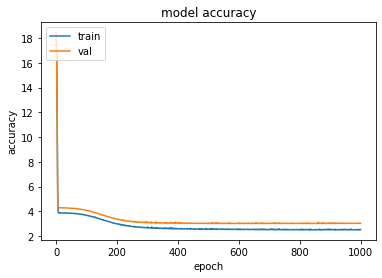

In [101]:
alcohol = merged[:, 26] + merged[:, 27]

X = np.column_stack((normalized[:,:26],normalized[:,28:30]))
X = np.column_stack((X,normalized[:,32]))
print(X.shape)
X_train, X_test, y_train, y_test = skl.train_test_split(X, alcohol, test_size=0.4, random_state=1)




NN_model = Sequential()

NN_model.add(Dense(28, input_dim = X_train.shape[1], activation='softmax'))

# The Hidden Layers :
NN_model.add(Dense(18, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error',optimizer=keras.optimizers.adam(learning_rate=1e-3))
NN_model.summary()
##higher learning rate -> overfitting             
             
history = NN_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose = 1, validation_data=(X_test, y_test))

#custom_loss = mean_squared_error(y_test,pred_y)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()             